AIT 736-001

Professor: Lei Yang

Project Team 4

Project Title: 'Cats vs Dogs' Classification using CNN Keras

Group Members:

Praneeth Ravirala (G01448129)

Shalvi Sanjay Lale (G01419005)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import zipfile
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Input,Dropout
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [8]:
#zip_file_path = '/content/drive/MyDrive/train.zip'
#extract_to = '/content/drive/MyDrive/'
#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  #  zip_ref.extractall(extract_to)

#print(f"Files extracted to: {extract_to}")


In [ ]:
zip_file_path = '/content/drive/MyDrive/test1.zip'
extract_to = '/content/drive/MyDrive/'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Files extracted to: {extract_to}")

Files extracted to: /content/drive/MyDrive/


In [ ]:
len(os.listdir('/content/drive/MyDrive/test1'))

12500

In [ ]:
train_path='/content/drive/MyDrive/train'

In [ ]:
imageset=os.listdir(train_path)
train_set,test_set=train_test_split(imageset,test_size=0.2,random_state=42)

In [ ]:
path='/content/drive/MyDrive/train_images'
os.mkdir(path)
path='/content/drive/MyDrive/train_images/0'
os.mkdir(path)
path='/content/drive/MyDrive/train_images/1'
os.mkdir(path)

In [ ]:
for i in train_set:
  if i[0:3]=='cat':
    image_path = os.path.join(train_path, i)
    try:
      img = Image.open(image_path)
      if img.mode != 'RGB':
        img = img.convert('RGB')
      save_img_path=os.path.join('/content/drive/MyDrive/train_images/0',i)
      img.save(save_img_path, "JPEG")
    except Exception as e:
      print(f"Error converting {image_path}: {e}")
  elif i[0:3]=='dog':
    image_path = os.path.join(train_path, i)
    try:
      img = Image.open(image_path)
      if img.mode != 'RGB':
        img = img.convert('RGB')
      save_img_path=os.path.join('/content/drive/MyDrive/train_images/1',i)
      img.save(save_img_path, "JPEG")
    except Exception as e:
      print(f"Error converting {image_path}: {e}")


In [ ]:
path='/content/drive/MyDrive/test_images'
os.mkdir(path)
path='/content/drive/MyDrive/test_images/0'
os.mkdir(path)
path='/content/drive/MyDrive/test_images/1'
os.mkdir(path)

In [ ]:
for i in test_set:
  if i[0:3]=='cat':
    image_path = os.path.join(train_path, i)
    try:
      img = Image.open(image_path)
      if img.mode != 'RGB':
        img = img.convert('RGB')
      save_img_path=os.path.join('/content/drive/MyDrive/test_images/0',i)
      img.save(save_img_path, "JPEG")
    except Exception as e:
      print(f"Error converting {image_path}: {e}")
  elif i[0:3]=='dog':
    image_path = os.path.join(train_path, i)
    try:
      img = Image.open(image_path)
      if img.mode != 'RGB':
        img = img.convert('RGB')
      save_img_path=os.path.join('/content/drive/MyDrive/test_images/1',i)
      img.save(save_img_path, "JPEG")
    except Exception as e:
      print(f"Error converting {image_path}: {e}")


In [3]:
train_path='/content/drive/MyDrive/train_images'
test_path='/content/drive/MyDrive/test_images'

In [7]:
print(len(os.listdir(train_path+'/0'))+len(os.listdir(train_path+'/1')))

20000


In [6]:
print(len(os.listdir(train_path+'/0')))
print(len(os.listdir(train_path+'/1')))
print(len(os.listdir(test_path+'/0')))
print(len(os.listdir(test_path+'/1')))

9985
10015
2515
2485


In [ ]:
train_dataset = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

validation_dataset = ImageDataGenerator(rescale=1. / 255,
                                        validation_split=0.2)

test_dataset = ImageDataGenerator(rescale=1. / 255)


In [ ]:
train_data_generator = train_dataset.flow_from_directory(
    train_path,
    class_mode='binary',
    target_size=(128, 128),
    batch_size=8,
    shuffle=True,
    subset='training',
    seed=256
    )
validation_data_generator = validation_dataset.flow_from_directory(
    train_path,
    class_mode='binary',
    target_size=(128, 128),
    batch_size=8,
    shuffle=True,
    subset='validation',
    seed=256
    )
test_data_generator = test_dataset.flow_from_directory(
    test_path,
    class_mode='binary',
    target_size=(128, 128),
    batch_size=8,
    shuffle=True
    )

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [9]:
train_dataset1 = image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='binary',
    image_size=(128, 128),
    batch_size=8,
    shuffle=True,
    validation_split=0.2,
    subset='training',
    seed=256  )

val_dataset1= image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='binary',
    image_size=(128, 128),
    batch_size=8,
    shuffle=True,
    validation_split=0.2,
    subset='validation',
    seed=256
)
test_dataset1 = image_dataset_from_directory(
    test_path,
    labels='inferred',
    label_mode='binary',
    image_size=(128, 128),
    batch_size=8,
    shuffle=True
)


Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 20000 files belonging to 2 classes.
Using 4000 files for validation.
Found 5000 files belonging to 2 classes.


In [ ]:
train_dataset1 = train_dataset1.map(lambda x, y: (x / 255.0, y))
val_dataset1 = val_dataset1.map(lambda x, y: (x / 255.0, y))
test_dataset1 = test_dataset1.map(lambda x, y: (x / 255.0, y))

In [12]:
for images, labels in train_dataset1.take(1):
    print("Image batch shape:", images.numpy())
    print("Label values:", labels.numpy())

Image batch shape: [[[[5.09799805e+01 5.09799805e+01 5.89799805e+01]
   [5.46923828e+01 5.48173828e+01 6.24423828e+01]
   [5.09565430e+01 5.19565430e+01 5.69565430e+01]
   ...
   [9.06796875e+01 4.50170898e+01 1.60190430e+01]
   [1.03846680e+02 5.31801758e+01 1.99580078e+01]
   [1.05630859e+02 5.13134766e+01 1.51547852e+01]]

  [[5.00478516e+01 5.07626953e+01 5.85244141e+01]
   [5.33266602e+01 5.41367188e+01 6.15532227e+01]
   [5.33681641e+01 5.48447266e+01 5.98447266e+01]
   ...
   [6.39160156e+01 2.19638672e+01 9.52148438e-02]
   [6.89746094e+01 2.28442383e+01 0.00000000e+00]
   [7.96582031e+01 3.05698242e+01 2.38037109e+00]]

  [[5.11879883e+01 5.41879883e+01 6.11879883e+01]
   [3.99877930e+01 4.29877930e+01 4.97377930e+01]
   [4.24770508e+01 4.54770508e+01 5.04770508e+01]
   ...
   [5.30781250e+01 1.68085938e+01 0.00000000e+00]
   [5.41552734e+01 1.63608398e+01 0.00000000e+00]
   [5.93139648e+01 2.02358398e+01 0.00000000e+00]]

  ...

  [[1.02711914e+02 6.47119141e+01 5.37119141e+0

In [11]:
for images, labels in test_dataset1.take(1):
  print("Image batch shape:", images.shape)
  print("Label batch shape:", labels.shape)
  print("Label values:", labels.numpy())


Image batch shape: (8, 128, 128, 3)
Label batch shape: (8, 1)
Label values: [[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]]


In [ ]:
Model = Sequential()
Model.add(Input(shape=(128,128,3)))
Model.add(Conv2D(32, (2, 2),padding='same',activation='relu'))
Model.add(MaxPooling2D((2, 2)))
Model.add(Conv2D(32, (2, 2),padding='same',activation='relu'))
Model.add(MaxPooling2D((2, 2)))
Model.add(Flatten())
Model.add(Dense(256,activation='relu'))
Model.add(Dropout(0.5))
Model.add(Dense(1,activation='sigmoid'))

In [ ]:
Model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,393,665 (32.02 MB)

 Trainable params: 8,393,665 (32.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)
Model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
TrainHistory=Model.fit(train_data_generator, epochs=20, validation_data=validation_data_generator)

Epoch 1/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 118s 58ms/step - accuracy: 0.5509 - loss: 0.6838 - val_accuracy: 0.6593 - val_loss: 0.6177
Epoch 2/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 115s 57ms/step - accuracy: 0.6524 - loss: 0.6240 - val_accuracy: 0.6877 - val_loss: 0.5826
Epoch 3/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 116s 58ms/step - accuracy: 0.6857 - loss: 0.5878 - val_accuracy: 0.6860 - val_loss: 0.5860
Epoch 4/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 114s 57ms/step - accuracy: 0.7072 - loss: 0.5692 - val_accuracy: 0.7480 - val_loss: 0.5140
Epoch 5/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 116s 58ms/step - accuracy: 0.7299 - loss: 0.5360 - val_accuracy: 0.7600 - val_loss: 0.5130
Epoch 6/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 116s 58ms/step - accuracy: 0.7318 - loss: 0.5321 - val_accuracy: 0.7502 - val_loss: 0.5100
Epoch 7/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 115s 57ms/step - accuracy: 0.7435 - loss: 0.5176 - val_accuracy: 0.7492 - val_loss: 0.4986
Epoch 8/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 116s 58ms/step - accuracy: 

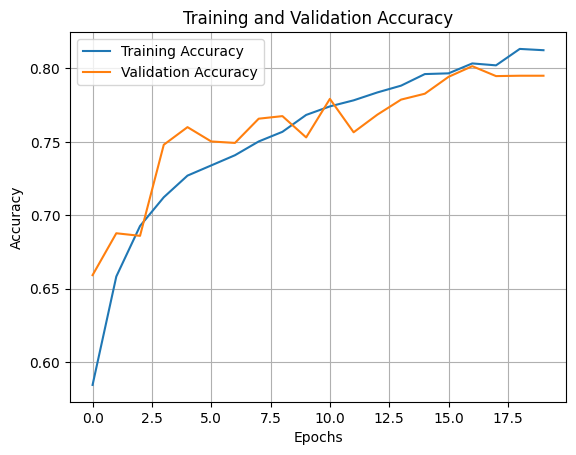

In [ ]:
plt.plot(TrainHistory.history['accuracy'], label='Training Accuracy')
plt.plot(TrainHistory.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

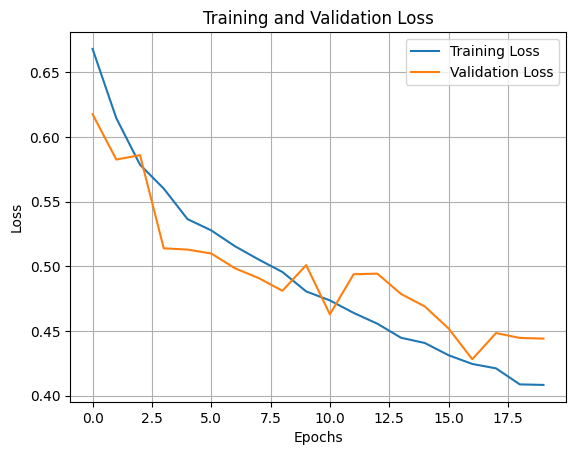

In [ ]:
plt.plot(TrainHistory.history['loss'], label='Training Loss')
plt.plot(TrainHistory.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [53]:
#Model.save('/content/drive/MyDrive/model3.keras')  # HDF5 format
Model.save('/content/drive/MyDrive/model3.h5')

In [44]:
test_path_0='/content/drive/MyDrive/test_images/0'
test_path_1='/content/drive/MyDrive/test_images/1'
total_path=[test_path_0,test_path_1]
test_class=[]
predicted_class=[]
for i in total_path:
  for j in os.listdir(i):
    image_path=os.path.join(i,j)
    test_img=load_img(image_path,target_size=(128,128,3))
    img_array=np.array(test_img)
    img_array=img_array/255.0
    img_array=img_array.reshape(1,128,128,3)
    pred=Model.predict(img_array)
    test_class.append(i[-1])
    print(pred)
    if pred>=0.5:
      predicted_class.append('1')
    else:
      predicted_class.append('0')

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.01483812]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.51126695]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.38462403]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.23671848]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.01302945]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.17981605]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.14851877]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.08202459]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.0315622]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.30271772]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.51990795]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.00217452]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.00773458]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.2635891]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.57662994]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.31277815]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.20785919]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.48332712

In [45]:
TP=0
TN=0
FN=0
FP=0
for i in zip(test_class,predicted_class):
  if i[0]=='1' and i[1]=='1':
    TP=TP+1
  elif i[0]=='0' and i[1]=='0':
    TN=TN+1
  elif i[0]=='1' and i[1]=='0':
    FN=FN+1
  elif i[0]=='0' and i[1]=='1':
    FP=FP+1

In [46]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F1_Score=2*(Precision*Recall)/(Precision+Recall)

In [47]:
print(Accuracy)
print(Precision)
print(Recall)
print(F1_Score)

0.7914
0.8167838312829525
0.7480885311871227
0.7809283763915144


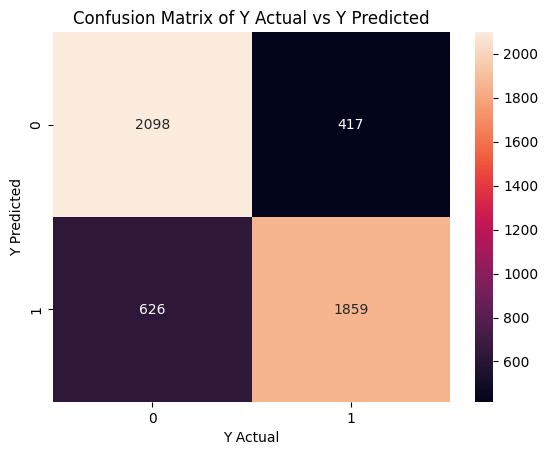

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
CM=confusion_matrix(test_class,predicted_class)
sb.heatmap(CM,annot=True, fmt='d')
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.title('Confusion Matrix of Y Actual vs Y Predicted')
plt.show()

In [52]:
from sklearn.metrics import classification_report
CR = classification_report(test_class,predicted_class, target_names=['Class 0', 'Class 1'])
print(CR)

              precision    recall  f1-score   support

     Class 0       0.77      0.83      0.80      2515
     Class 1       0.82      0.75      0.78      2485

    accuracy                           0.79      5000
   macro avg       0.79      0.79      0.79      5000
weighted avg       0.79      0.79      0.79      5000



References:

[1].GeeksforGeeks. (2023, February 3). Python | Image Classification using Keras. GeeksforGeeks.
[2].Kumar, R. (2024, November 30). Building and Using a Convolutional Neural Network (CNN) for Image Classification with Keras and TensorFlow. Medium.
[3].Devansh. (2024, November 20). Image Classification Using CNN with Keras & CIFAR-10. Analytics Vidhya.

[4].microsoft/cats_vs_dogs · Datasets at Hugging Face. (2023, September 19).

[5].Dogs vs. Cats. (n.d.). Kaggle.

[6].GeeksforGeeks. (2024, June 19). Python Tkinter. GeeksforGeeks.

[7].Ajay. (2024, January 22). Deploying deep learning model using Tkinter and PyInstaller. Analytics Vidhya.








In [15]:
from google.colab import files
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/736Project.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/736Project.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 877108 bytes to /content/drive/MyDrive/Colab Notebooks/736Project.html
